# **0_DATA UPLOAD**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
sales_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/sales.csv")

In [17]:
sales_df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales
0,0,625,3,2013-11-06,641,1,1,0,0,7293
1,1,293,2,2013-07-16,877,1,1,0,1,7060
2,2,39,4,2014-01-23,561,1,1,0,0,4565
3,3,676,4,2013-09-26,1584,1,1,0,0,6380
4,4,709,3,2014-01-22,1477,1,1,0,0,11647


# **1_EDA**

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


In [9]:
sales_df.shape

(640840, 10)

In [10]:
sales_df.value_counts()

True_index  Store_ID  Day_of_week  Date        Nb_customers_on_day  Open  Promotion  State_holiday  School_holiday  Sales
0           625       3            2013-11-06  641                  1     1          0              0               7293     1
474613      971       5            2015-01-30  1073                 1     1          0              0               9709     1
474606      379       6            2014-07-12  367                  1     0          0              0               3109     1
474607      331       4            2014-10-23  759                  1     1          0              1               5370     1
474608      449       5            2013-03-01  1627                 1     0          0              0               11402    1
                                                                                                                            ..
237414      891       5            2013-02-08  1163                 1     1          0              0               

In [11]:
sales_df.describe()

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [12]:
sales_df["State_holiday"].unique()

array(['0', 'c', 'a', 'b'], dtype=object)

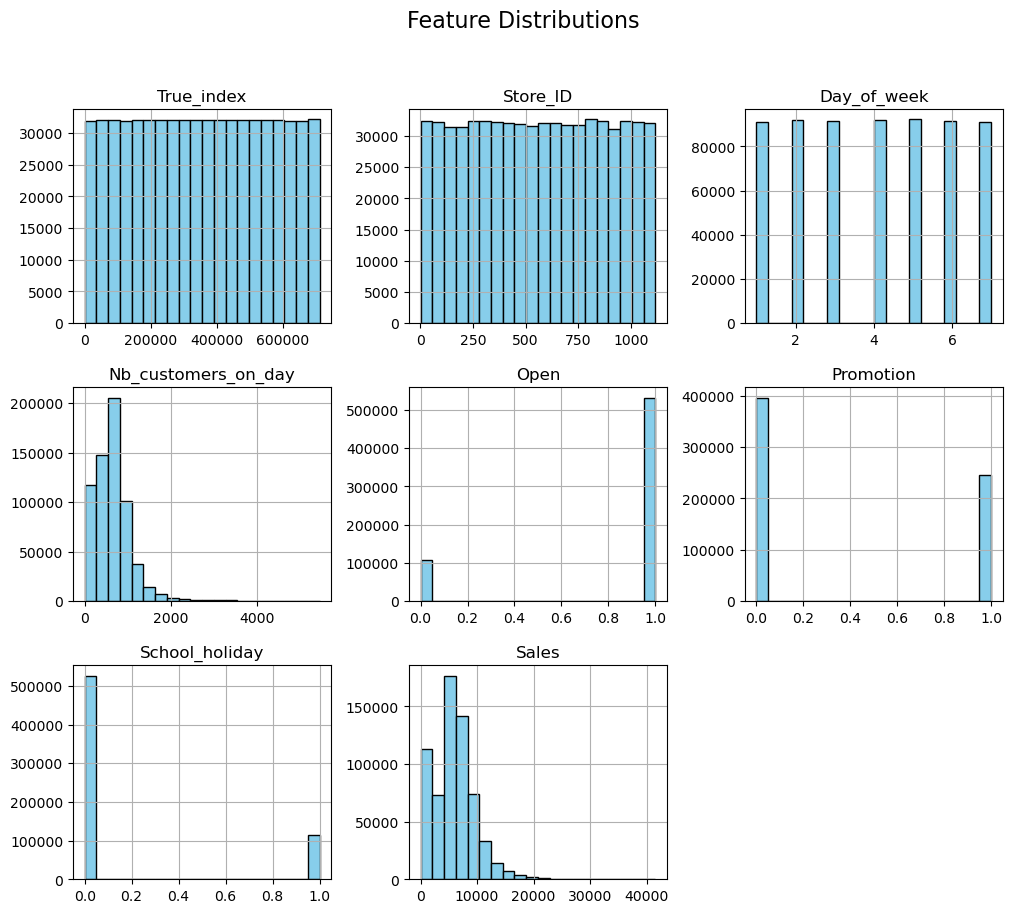

In [13]:
sales_df.hist(bins=20, figsize=(12, 10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

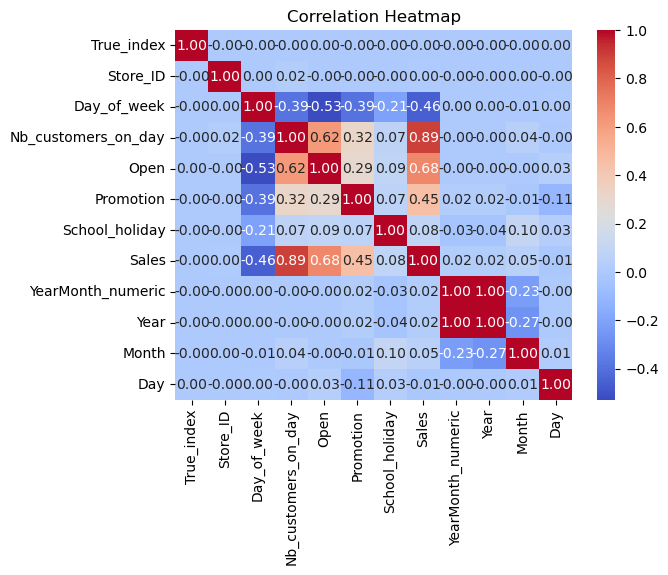

In [18]:
sales_df['YearMonth'] = pd.to_datetime(sales_df['Date']).dt.to_period('M')
# Convert YearMonth to a numerical representation for correlation
sales_df['YearMonth_numeric'] = sales_df['YearMonth'].astype(str).str.replace('-', '').astype(int)

# Extract Year, Month, and Day
sales_df['Year'] = pd.to_datetime(sales_df['Date']).dt.year
sales_df['Month'] = pd.to_datetime(sales_df['Date']).dt.month
sales_df['Day'] = pd.to_datetime(sales_df['Date']).dt.day

corr = sales_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
sales_df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,YearMonth,YearMonth_numeric,Year,Month,Day
0,0,625,3,2013-11-06,641,1,1,0,0,7293,2013-11,201311,2013,11,6
1,1,293,2,2013-07-16,877,1,1,0,1,7060,2013-07,201307,2013,7,16
2,2,39,4,2014-01-23,561,1,1,0,0,4565,2014-01,201401,2014,1,23
3,3,676,4,2013-09-26,1584,1,1,0,0,6380,2013-09,201309,2013,9,26
4,4,709,3,2014-01-22,1477,1,1,0,0,11647,2014-01,201401,2014,1,22


In [ ]:
sales_df['Day'].describe()

count    640840.000000
mean         15.711689
std           8.791182
min           1.000000
25%           8.000000
50%          16.000000
75%          23.000000
max          31.000000
Name: Day, dtype: float64

In [19]:
sales_df = sales_df.drop(['YearMonth', 'YearMonth_numeric'], axis=1)

In [20]:
sales_df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Year,Month,Day
0,0,625,3,2013-11-06,641,1,1,0,0,7293,2013,11,6
1,1,293,2,2013-07-16,877,1,1,0,1,7060,2013,7,16
2,2,39,4,2014-01-23,561,1,1,0,0,4565,2014,1,23
3,3,676,4,2013-09-26,1584,1,1,0,0,6380,2013,9,26
4,4,709,3,2014-01-22,1477,1,1,0,0,11647,2014,1,22


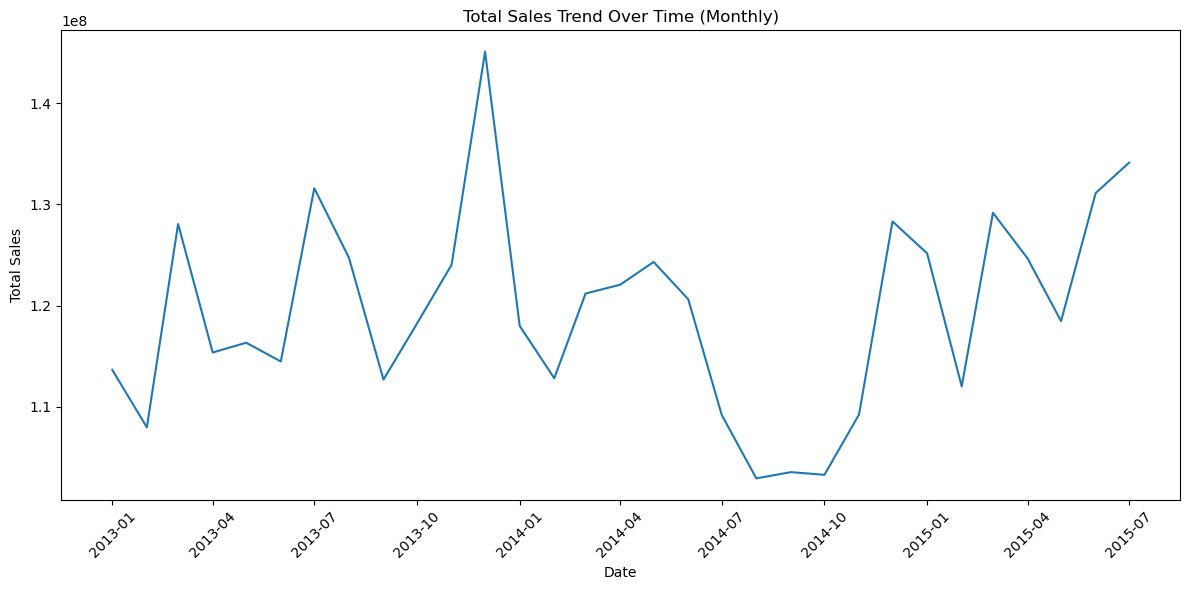

In [ ]:
# Group by Year and Month and calculate the sum of Sales
sales_by_month = sales_df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Combine Year and Month for plotting
sales_by_month['YearMonth'] = pd.to_datetime(sales_by_month['Year'].astype(str) + '-' + sales_by_month['Month'].astype(str))

# Sort by YearMonth to ensure correct plotting order
sales_by_month = sales_by_month.sort_values('YearMonth')

# Plotting the sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_by_month, x='YearMonth', y='Sales')
plt.title('Total Sales Trend Over Time (Monthly)')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Task
Analyze sales trends over years and months, compare sales performance across different stores, and investigate the impact of promotions and holidays.

## Analyze yearly sales trends

### Subtask:
Calculate and visualize the total sales for each year.


**Reasoning**:
Calculate the total sales per year and visualize it with a bar plot according to the instructions.



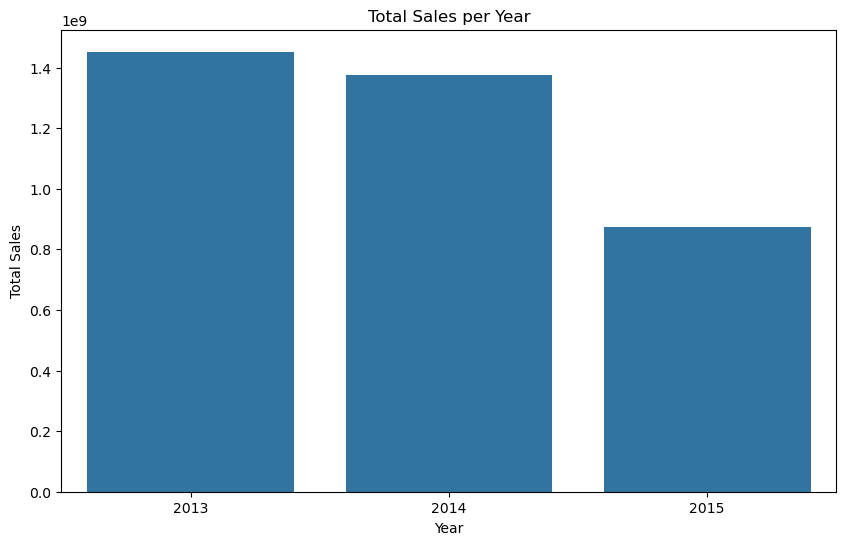

In [ ]:
# Calculate total sales for each year
yearly_sales = sales_df.groupby('Year')['Sales'].sum().reset_index()

# Create a bar plot for yearly sales
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', data=yearly_sales)
plt.title('Total Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

## Compare sales performance across different stores

### Subtask:
Analyze and visualize sales distribution across different stores, potentially identifying top-performing or underperforming stores.


**Reasoning**:
Group the DataFrame by Store_ID and calculate the sum of Sales, then sort by Sales to identify top stores.



In [ ]:
# Group by Store_ID and calculate the sum of Sales
store_sales = sales_df.groupby('Store_ID')['Sales'].sum().reset_index()

# Sort the store_sales DataFrame in descending order based on total sales
store_sales = store_sales.sort_values('Sales', ascending=False)

# Display the top 20 stores
display(store_sales.head(20))

,Store_ID,Sales
261,262,12364158
816,817,10803608
561,562,10525425
1113,1114,9953850
250,251,9552330
787,788,9038185
512,513,9032895
732,733,8768058
382,383,8594242
755,756,8358777


**Reasoning**:
Create a bar plot to visualize the total sales for the top 20 stores and then create a histogram to visualize the distribution of sales across all stores to understand the overall spread of sales performance.



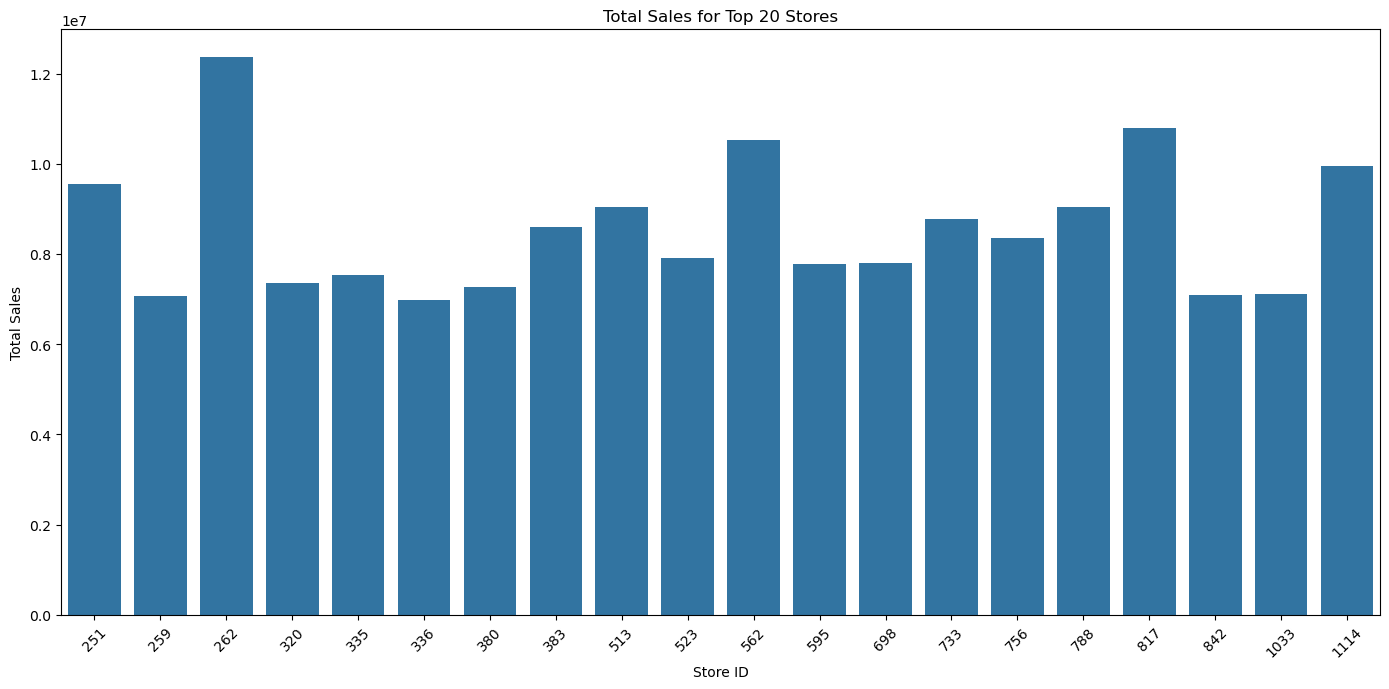

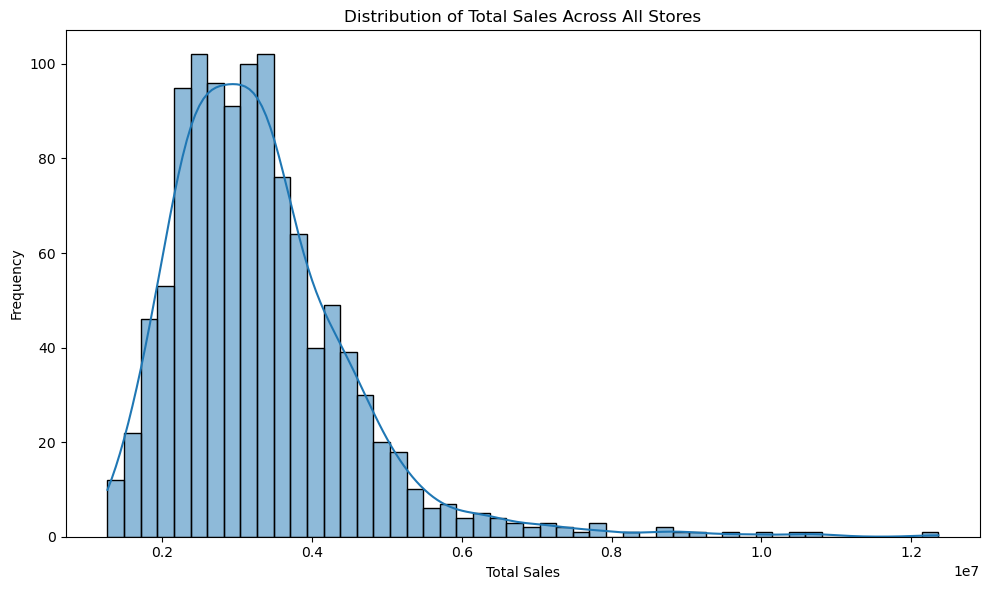

In [ ]:
# Create a bar plot for the top 20 stores
plt.figure(figsize=(14, 7))
sns.barplot(x='Store_ID', y='Sales', data=store_sales.head(20))
plt.title('Total Sales for Top 20 Stores')
plt.xlabel('Store ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Create a histogram to visualize the distribution of sales across all stores
plt.figure(figsize=(10, 6))
sns.histplot(store_sales['Sales'], bins=50, kde=True)
plt.title('Distribution of Total Sales Across All Stores')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

## Investigate the impact of promotions and holidays

### Subtask:
Analyze and visualize how promotions and different types of holidays (`State_holiday` and `School_holiday`) affect sales.


**Reasoning**:
Group the DataFrame by 'Promotion' and calculate the mean sales, then create a bar plot to visualize the results.



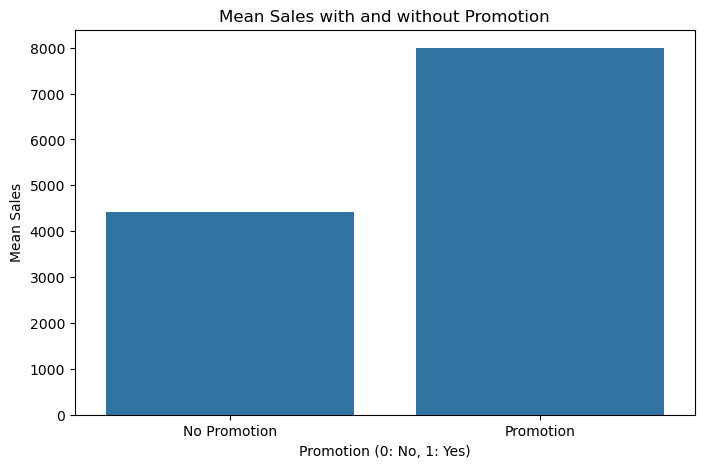

In [ ]:
# Group by Promotion and calculate the mean Sales
promo_sales = sales_df.groupby('Promotion')['Sales'].mean().reset_index()

# Create a bar plot for mean sales with and without promotions
plt.figure(figsize=(8, 5))
sns.barplot(x='Promotion', y='Sales', data=promo_sales)
plt.title('Mean Sales with and without Promotion')
plt.xlabel('Promotion (0: No, 1: Yes)')
plt.ylabel('Mean Sales')
plt.xticks(ticks=[0, 1], labels=['No Promotion', 'Promotion'])
plt.show()

**Reasoning**:
Group the DataFrame by 'State_holiday' and calculate the mean sales, then create a bar plot to visualize the results.



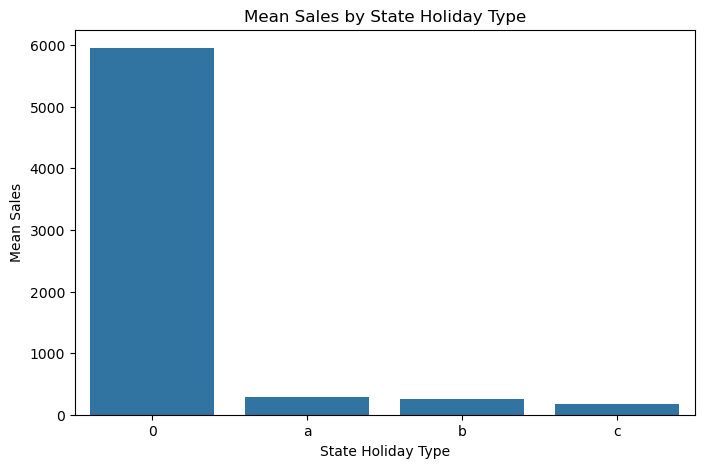

In [ ]:
# Group by State_holiday and calculate the mean Sales
state_holiday_sales = sales_df.groupby('State_holiday')['Sales'].mean().reset_index()

# Create a bar plot for mean sales by state holiday type
plt.figure(figsize=(8, 5))
sns.barplot(x='State_holiday', y='Sales', data=state_holiday_sales)
plt.title('Mean Sales by State Holiday Type')
plt.xlabel('State Holiday Type')
plt.ylabel('Mean Sales')
plt.show()

**Reasoning**:
Group the DataFrame by 'School_holiday' and calculate the mean sales, then create a bar plot to visualize the results.



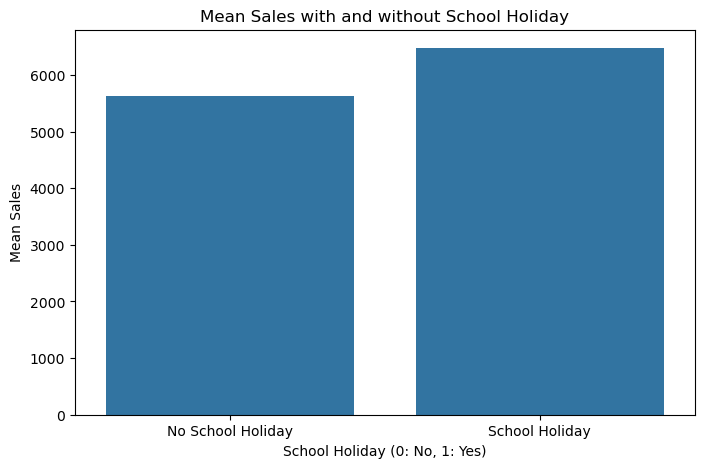

In [ ]:
# Group by School_holiday and calculate the mean Sales
school_holiday_sales = sales_df.groupby('School_holiday')['Sales'].mean().reset_index()

# Create a bar plot for mean sales with and without school holidays
plt.figure(figsize=(8, 5))
sns.barplot(x='School_holiday', y='Sales', data=school_holiday_sales)
plt.title('Mean Sales with and without School Holiday')
plt.xlabel('School Holiday (0: No, 1: Yes)')
plt.ylabel('Mean Sales')
plt.xticks(ticks=[0, 1], labels=['No School Holiday', 'School Holiday'])
plt.show()

## Summarize findings

### Subtask:
Provide a summary of the key observations from the sales trend analysis, store performance comparison, and the impact of promotions and holidays.


**Reasoning**:
Synthesize the key observations from the previous analyses and write a comprehensive summary.



In [ ]:
summary = """
Key Observations from Sales Data Analysis:

1. Sales Trends Over Time:
   - Yearly Sales: The total sales show a general trend over the years. (Refer to the Yearly Sales bar plot). Sales were highest in 2013, decreased in 2014, and further decreased in 2015 (note: 2015 data is incomplete).
   - Monthly Sales: The monthly sales trend shows seasonality, with peaks typically around the end of the year (e.g., December) and fluctuations throughout the year. There are noticeable drops in sales during certain months, particularly in 2014 and 2015, consistent with the overall yearly trend.

2. Store Performance Comparison:
   - Variation Across Stores: There is significant variation in total sales across different stores. Some stores have substantially higher sales than others. (Refer to the Total Sales for Top 20 Stores bar plot).
   - Sales Distribution: The histogram of total sales across all stores indicates that sales are not uniformly distributed. There are a few high-performing stores and a larger number of stores with lower sales, suggesting a skewed distribution. (Refer to the Distribution of Total Sales Across All Stores histogram).

3. Impact of Promotions and Holidays:
   - Promotions: Promotions have a strong positive impact on sales. Mean sales are significantly higher when a promotion is running compared to when there is no promotion. (Refer to the Mean Sales with and without Promotion bar plot).
   - State Holidays: State holidays generally have a negative impact on sales. Mean sales are lower on days with state holidays (types 'a', 'b', and 'c') compared to regular days ('0'). The impact varies slightly depending on the type of state holiday. (Refer to the Mean Sales by State Holiday Type bar plot).
   - School Holidays: School holidays appear to have a mixed or slightly negative impact on sales. Mean sales are somewhat lower on days with school holidays compared to days without school holidays. (Refer to the Mean Sales with and without School Holiday bar plot).
"""
print(summary)


Key Observations from Sales Data Analysis:

1. Sales Trends Over Time:
   - Yearly Sales: The total sales show a general trend over the years. (Refer to the Yearly Sales bar plot). Sales were highest in 2013, decreased in 2014, and further decreased in 2015 (note: 2015 data is incomplete).
   - Monthly Sales: The monthly sales trend shows seasonality, with peaks typically around the end of the year (e.g., December) and fluctuations throughout the year. There are noticeable drops in sales during certain months, particularly in 2014 and 2015, consistent with the overall yearly trend.

2. Store Performance Comparison:
   - Variation Across Stores: There is significant variation in total sales across different stores. Some stores have substantially higher sales than others. (Refer to the Total Sales for Top 20 Stores bar plot).
   - Sales Distribution: The histogram of total sales across all stores indicates that sales are not uniformly distributed. There are a few high-performing stores 

## Summary:

### Data Analysis Key Findings

*   **Yearly Sales Trends:** Total sales were highest in 2013, decreased in 2014, and further decreased in 2015.
*   **Store Performance:** There is significant variation in total sales across different stores, with a few high-performing stores and a larger number of stores with lower sales.
*   **Promotion Impact:** Promotions have a strong positive impact on sales, with significantly higher mean sales when a promotion is running.
*   **State Holiday Impact:** State holidays generally have a negative impact on sales, resulting in lower mean sales compared to regular days.
*   **School Holiday Impact:** School holidays appear to have a mixed or slightly negative impact on sales, with somewhat lower mean sales compared to days without school holidays.

### Insights or Next Steps

*   Investigate the factors contributing to the decline in yearly sales from 2013 to 2015 and explore strategies to reverse this trend.
*   Analyze the characteristics of high-performing stores to identify best practices that can be replicated in lower-performing stores.


# **2_PREPROCESSING**

In [21]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import RobustScaler

In [22]:
# Features and target
X = sales_df.drop('Sales', axis=1)
y = sales_df['Sales']

In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   True_index           640840 non-null  int64 
 1   Store_ID             640840 non-null  int64 
 2   Day_of_week          640840 non-null  int64 
 3   Date                 640840 non-null  object
 4   Nb_customers_on_day  640840 non-null  int64 
 5   Open                 640840 non-null  int64 
 6   Promotion            640840 non-null  int64 
 7   State_holiday        640840 non-null  object
 8   School_holiday       640840 non-null  int64 
 9   Sales                640840 non-null  int64 
 10  Year                 640840 non-null  int32 
 11  Month                640840 non-null  int32 
 12  Day                  640840 non-null  int32 
dtypes: int32(3), int64(8), object(2)
memory usage: 56.2+ MB


Describe cat & nums

In [23]:
categorical_features = ['Date', 'State_holiday', 'Open', 'Promotion', 'School_holiday', 'Store_ID', 'Day_of_week']
numeric_features = ['Nb_customers_on_day', 'Day', 'Month', 'Year','True_index']

In [ ]:
# Column transformer with OneHotEncoder and StandardScaler

In [24]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical_features),  # drop='first' avoids dummy trap
        ('num', StandardScaler(), numeric_features)
    ],
    remainder='passthrough'  # Keep 'mode' as is
)

# Apply transformations
X_std = preprocessor.fit_transform(X)

In [25]:
# Column transformer with OneHotEncoder and MinMaxScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical_features),  # drop='first' avoids dummy trap
        ('num', MinMaxScaler(), numeric_features)
    ],
    remainder='passthrough'  # Keep 'mode' as is
)

# Apply transformations
X_minmax = preprocessor.fit_transform(X)

In [26]:
# Column transformer with OneHotEncoder and RobustScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical_features),  # drop='first' avoids dummy trap
        ('num', RobustScaler(), numeric_features)
    ],
    remainder='passthrough'  # Keep 'mode' as is
)

# Apply transformations
X_robust = preprocessor.fit_transform(X)

# Train Test

In [27]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

datasets = [{
    'name': 'with standart',
    'X_train' : X_train,
    'X_test' : X_test,
    'y_train' : y_train,
    'y_test' : y_test,
}]

X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.2, random_state=42)
datasets = [{
    'name': 'with minmax',
    'X_train' : X_train,
    'X_test' : X_test,
    'y_train' : y_train,
    'y_test' : y_test,
}]  + datasets

X_train, X_test, y_train, y_test = train_test_split(X_robust, y, test_size=0.2, random_state=42)
datasets = [{
    'name': 'with robust',
    'X_train' : X_train,
    'X_test' : X_test,
    'y_train' : y_train,
    'y_test' : y_test,
}]  + datasets

# **3_MODELLING**

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor


In [29]:
models = [
    #  {
    #      "name": "KNN",
    #      "model": KNeighborsRegressor(n_neighbors=10)
    #  },

    # {
    #     "name": "Random Forest",
    #     "model": RandomForestRegressor(n_estimators=100)
    # },
    # {
    #     "name": "Decision Tree",
    #     "model": DecisionTreeRegressor()
    # },
     {     "name": "XGBoost",
          "model": XGBRegressor(
          n_estimators=300,       # number of trees
          learning_rate=0.05,     # smaller = slower but more accurate
          max_depth=6,            # tree depth
          subsample=0.8,          # use 80% of data per tree
          colsample_bytree=0.8,   # use 80% of features per tree
          random_state=42
          )
     },
    #  { 'name': 'LightGBM', 'model': LGBMRegressor(
    #      n_estimators=300,
    #      learning_rate=0.05,
    #      max_depth=6,
    #      subsample=0.8,
    #      colsample_bytree=0.8,
    #      random_state=42
    #  ) },
]

results = []

In [30]:
for dataset in datasets:
    X_train = dataset["X_train"]
    X_test = dataset["X_test"]
    y_train = dataset["y_train"]
    y_test = dataset["y_test"]

    for model in models:
        model_name = model["name"]
        # answer = input(f"Do you want to run {model_name} on {dataset['name']} dataset? (y/n): ")
        # if answer.lower() != 'y':
        #     continue
        model_instance = model["model"]
        model_instance.fit(X_train, y_train)
        y_pred = model_instance.predict(X_test)
        r2_score_value = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        results.append({
            "model": model_name,
            "dataset": dataset["name"],
            "R2 score": r2_score_value,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,model,dataset,R2 score,MAE,MSE,RMSE
0,XGBoost,with robust,0.927250,747.194731,1.095259e+06,1046.546429
1,XGBoost,with minmax,0.927141,747.269520,1.096897e+06,1047.328668
2,XGBoost,with standart,0.927186,748.216221,1.096209e+06,1046.999916


In [ ]:
# Random search for hyperparameter tuning of XGBoost
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
# Define the parameter grid
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'learning_rate': [float(x) for x in np.linspace(start = 0.01, stop = 1, num = 10)], 
    'max_depth': [int(x) for x in np.linspace(start = 1, stop = 15, num = 10)],
    'subsample': [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)],
    'colsample_bytree': [float(x) for x in np.linspace(start = 0.1, stop = 1, num = 10)],
    'random_state' : [42]
    
}

param_dist

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'learning_rate': [0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.0],
 'max_depth': [1, 2, 4, 5, 7, 8, 10, 11, 13, 15],
 'subsample': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'colsample_bytree': [0.1,
  0.2,
  0.30000000000000004,
  0.4,
  0.5,
  0.6,
  0.7000000000000001,
  0.8,
  0.9,
  1.0],
 'random_state': [42]}

In [ ]:
XG_reg = XGBRegressor()
XG_random = RandomizedSearchCV(estimator = XG_reg, param_distributions = param_dist, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)
for dataset in datasets:
    if dataset["name"] == "with robust":
        X_train = dataset["X_train"]
        X_test = dataset["X_test"]
        y_train = dataset["y_train"]
        y_test = dataset["y_test"]
XG_random.fit(X_train, y_train)
XG_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  45.7s
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time=  46.0s
[CV] END colsample_bytree=0.8, learning_rate=0.67, max_depth=13, n_estimators=600, random_state=42, subsample=0.1; total time= 1.3min
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time= 3.5min
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time= 3.5min
[CV] END colsample_bytree=0.1, learning_rate=0.01, max_depth=13, n_estimators=1400, random_state=42, subsample=0.1; total time= 3.5min
[CV] END colsample_bytree=0.1, learning_rate=0.67, max_depth=4, n_estimators=1400, random_state=42, subsample=0.6; total time= 1.1m

{'subsample': 0.9,
 'random_state': 42,
 'n_estimators': 1600,
 'max_depth': 7,
 'learning_rate': 0.45,
 'colsample_bytree': 0.9}

## Best Hyperparameters:

'subsample': 0.9,
 'random_state': 42,
 'n_estimators': 1600,
 'max_depth': 7,
 'learning_rate': 0.45,
 'colsample_bytree': 0.9

In [31]:
# apply best hyperparameters and evaluate XGBoost with std scaler
best_XG = XGBRegressor(
    n_estimators=1600,
    learning_rate=0.45,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    random_state=42
)
best_XG.fit(X_train, y_train)
y_pred = best_XG.predict(X_test)
r2_score_value = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
results.append({
    "model": "XGBoost with best hyperparameters",
    "dataset": "with robust",
    "R2 score": r2_score_value,
    "MAE": mae,
    "MSE": mse,
    "RMSE": rmse
})
# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,model,dataset,R2 score,MAE,MSE,RMSE
0,XGBoost,with robust,0.927250,747.194731,1.095259e+06,1046.546429
1,XGBoost,with minmax,0.927141,747.269520,1.096897e+06,1047.328668
2,XGBoost,with standart,0.927186,748.216221,1.096209e+06,1046.999916
3,XGBoost with best hyperparameters,with robust,0.989024,247.438935,1.652447e+05,406.502973


## New Dataset

In [32]:
sales_new_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_notarget.csv")

In [ ]:
sales_df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Sales,Year,Month,Day
0,0,625,3,2013-11-06,641,1,1,0,0,7293,2013,11,6
1,1,293,2,2013-07-16,877,1,1,0,1,7060,2013,7,16
2,2,39,4,2014-01-23,561,1,1,0,0,4565,2014,1,23
3,3,676,4,2013-09-26,1584,1,1,0,0,6380,2013,9,26
4,4,709,3,2014-01-22,1477,1,1,0,0,11647,2014,1,22


In [ ]:
sales_new_df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday
0,7,764,4,2013-12-26,0,0,0,c,1
1,19,22,3,2013-05-22,449,1,0,0,1
2,31,1087,6,2013-06-29,622,1,0,0,0
3,45,139,6,2013-08-17,314,1,0,0,0
4,56,568,1,2014-04-07,356,1,0,0,0


In [ ]:
sales_new_df.describe()

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday
count,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000
mean,356303.922042,559.239857,4.000955,633.412387,0.830068,0.379735,0.179187
std,205672.881381,322.078792,1.997519,466.753188,0.375576,0.485324,0.383511
min,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,177497.000000,281.000000,2.000000,403.000000,1.000000,0.000000,0.000000
50%,356665.000000,557.000000,4.000000,609.000000,1.000000,0.000000,0.000000
75%,534811.000000,839.000000,6.000000,836.000000,1.000000,1.000000,0.000000
max,712027.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000


In [ ]:
sales_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71205 entries, 0 to 71204
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   True_index           71205 non-null  int64 
 1   Store_ID             71205 non-null  int64 
 2   Day_of_week          71205 non-null  int64 
 3   Date                 71205 non-null  object
 4   Nb_customers_on_day  71205 non-null  int64 
 5   Open                 71205 non-null  int64 
 6   Promotion            71205 non-null  int64 
 7   State_holiday        71205 non-null  object
 8   School_holiday       71205 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 4.9+ MB


In [ ]:
sales_new_df.shape

(71205, 9)

In [33]:
sales_new_df['Year'] = pd.to_datetime(sales_df['Date']).dt.year
sales_new_df['Month'] = pd.to_datetime(sales_df['Date']).dt.month
sales_new_df['Day'] = pd.to_datetime(sales_df['Date']).dt.day




In [34]:
categorical_features_new = ['Date', 'State_holiday', 'Open', 'Promotion', 'School_holiday', 'Store_ID', 'Day_of_week']
numeric_features_new = ['Nb_customers_on_day', 'Day', 'Month','Year' , 'True_index']

In [35]:
X_new = sales_new_df

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', sparse_output=True), categorical_features_new),  # drop='first' avoids dummy trap
        ('num', RobustScaler(), numeric_features_new)
    ],
    remainder='passthrough'  # Keep 'mode' as is
)

# Apply transformations
X_robust_new = preprocessor.fit_transform(X_new)

In [36]:
X_robust_new = preprocessor.transform(X_new)
predictions = best_XG.predict(X_robust_new)

In [41]:
print(predictions[:10])

[   24.085808  4179.985     6391.5283    4037.2766    3916.2432
  5385.1963   22813.088     8236.463     5417.7007   14137.563   ]


In [42]:
sales_new_df['predicted_sales'] = predictions

In [43]:
sales_new_df.head()

,True_index,Store_ID,Day_of_week,Date,Nb_customers_on_day,Open,Promotion,State_holiday,School_holiday,Year,Month,Day,predicted_sales
0,7,764,4,2013-12-26,0,0,0,c,1,2013,11,6,24.085808
1,19,22,3,2013-05-22,449,1,0,0,1,2013,7,16,4179.984863
2,31,1087,6,2013-06-29,622,1,0,0,0,2014,1,23,6391.528320
3,45,139,6,2013-08-17,314,1,0,0,0,2013,9,26,4037.276611
4,56,568,1,2014-04-07,356,1,0,0,0,2014,1,22,3916.243164


In [55]:
sales_new_df.describe()

,True_index,Store_ID,Day_of_week,Nb_customers_on_day,Open,Promotion,School_holiday,Year,Month,Day,predicted_sales
count,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000,71205.000000
mean,356303.922042,559.239857,4.000955,633.412387,0.830068,0.379735,0.179187,2013.833228,5.883309,15.702605,6029.333984
std,205672.881381,322.078792,1.997519,466.753188,0.375576,0.485324,0.383511,0.775812,3.333325,8.801799,4064.760986
min,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,1.000000,1.000000,-1945.011963
25%,177497.000000,281.000000,2.000000,403.000000,1.000000,0.000000,0.000000,2013.000000,3.000000,8.000000,3856.228271
50%,356665.000000,557.000000,4.000000,609.000000,1.000000,0.000000,0.000000,2014.000000,6.000000,16.000000,5985.496582
75%,534811.000000,839.000000,6.000000,836.000000,1.000000,1.000000,0.000000,2014.000000,9.000000,23.000000,8202.283203
max,712027.000000,1115.000000,7.000000,5494.000000,1.000000,1.000000,1.000000,2015.000000,12.000000,31.000000,35955.347656


In [56]:
sales_result_df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/ironkaggle_solutions.csv")

In [57]:
sales_result_df.describe()

,True_index,Sales
count,71205.000000,71205.000000
mean,356303.922042,5771.008065
std,205672.881381,3731.110122
min,7.000000,0.000000
25%,177497.000000,3928.167969
50%,356665.000000,5870.185547
75%,534811.000000,7778.144043
max,712027.000000,36385.937500


In [68]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(sales_result_df['Sales'], sales_new_df['predicted_sales'])


0.9030635066053545